## Alzheimer's Disease Classifier

> In this project, we will make use of the features extracted from MRI images as well as data retrieved from ADNI database to classify Alzheimer's disease patient.

### Introduction

> - The purpose of the project is to make use of the data of 220 samples with 16 features extracted from MRI images to train a classifier model.
> - This classifier model can then be used to classifier subjects as cognitive normal or has Alzheimer's disease.

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

In [2]:
# load the dataset

df= pd.read_csv('Data_training_and_val_set_CNvsAD.csv')

In [3]:
# check the dataset

df.head()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
0,1063,937159,1401690,38855.4,3427.13,3262.01,1045.280,1263.010,2.44566,2.48342,2.47434,2.49197,2.27057,2.11083,2.99752,3.24032,0
1,184,901429,1235930,10081.2,3410.35,3693.69,529.756,391.364,2.52101,2.69526,2.81781,2.76115,2.42640,2.50153,3.40556,3.36431,0
2,16,935565,1345440,21299.0,3621.49,3802.43,887.978,1135.170,2.45128,2.53828,2.40015,2.46122,1.99782,2.40015,3.19497,3.02149,0
3,575,884775,1325760,69220.3,2802.91,3098.38,3215.570,3370.800,2.59348,2.62409,2.50552,2.95271,2.09972,2.12354,2.43217,2.99445,0
4,403,1062950,1498230,32967.7,3416.55,4103.49,1648.410,1480.410,2.78544,2.76651,2.71469,2.54695,2.38363,2.48169,3.71762,3.86305,0


In [4]:
# check the shape of the dataset

no_samples = df.shape[0]
no_cols = df.shape[1]

print("Number of samples = ", no_samples)
print("Number of features = ", no_cols)

Number of samples =  220
Number of features =  17


In [5]:
# check the data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RID         220 non-null    int64  
 1   BRAIN       220 non-null    int64  
 2   EICV        220 non-null    int64  
 3   VENTRICLES  220 non-null    float64
 4   LHIPPOC     220 non-null    float64
 5   RHIPPOC     220 non-null    float64
 6   LINFLATVEN  220 non-null    float64
 7   RINFLATVEN  220 non-null    float64
 8   LMIDTEMP    220 non-null    float64
 9   RMIDTEMP    220 non-null    float64
 10  LINFTEMP    220 non-null    float64
 11  RINFTEMP    220 non-null    float64
 12  LFUSIFORM   220 non-null    float64
 13  RFUSIFORM   220 non-null    float64
 14  LENTORHIN   220 non-null    float64
 15  RENTORHIN   220 non-null    float64
 16  DXCURREN    220 non-null    int64  
dtypes: float64(13), int64(4)
memory usage: 29.3 KB


Since all the features are numeric, we will explore the relationship between the features by obtaining their correlation coefficients. 

### Exploratory Data Analysis

In [6]:
# obtain the most correlated features from the dataset

cols = [col for col in df.columns[1:-1]] # exclude the individual identifier and diagnostic status from the columns
corr_feat = df[cols].corr() # get the correlation coefficients of all the features
corr_feat = corr_feat.unstack().sort_values(ascending=False) # unstack the dataframe and sort values in descending order
corr_feat = corr_feat.drop_duplicates() # drop duplicates to exclude the same feature correlation
corr_feat.head(10)

BRAIN       BRAIN         1.000000
            EICV          0.914554
LHIPPOC     RHIPPOC       0.882356
RMIDTEMP    RINFTEMP      0.874190
LINFTEMP    LMIDTEMP      0.871690
LINFLATVEN  RINFLATVEN    0.851397
LINFTEMP    LFUSIFORM     0.849473
RFUSIFORM   RINFTEMP      0.821934
LMIDTEMP    LFUSIFORM     0.803698
RMIDTEMP    RFUSIFORM     0.791022
dtype: float64

The above shows the features with highest positive correlation. **Volume of brain matters and EICV has the highest positive correlation coefficient**. Let's obtain those with negative relationship as well.

In [7]:
corr_feat.tail(10)

LMIDTEMP    RINFLATVEN   -0.465602
LENTORHIN   RINFLATVEN   -0.500521
RFUSIFORM   RINFLATVEN   -0.511817
LINFLATVEN  LFUSIFORM    -0.519430
            LMIDTEMP     -0.519734
RINFLATVEN  RINFTEMP     -0.524645
LINFTEMP    LINFLATVEN   -0.529090
RINFLATVEN  RENTORHIN    -0.532744
LENTORHIN   LINFLATVEN   -0.535279
RMIDTEMP    RINFLATVEN   -0.542264
dtype: float64

RMIDTEMP and RINFLATVEN shows the most (fairly) negative relationship.

We will further explore the relationship between the most positive and negative correlated features with scatterplots.

Text(0.5, 1.0, 'RMIDTEMP vs RINFLATVEN')

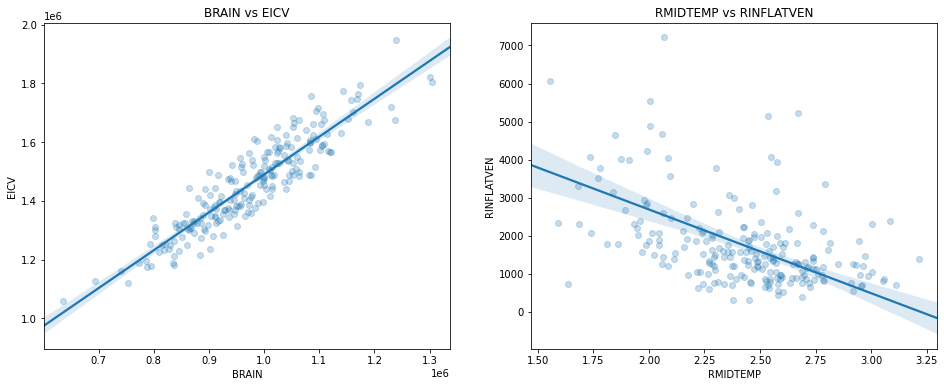

In [8]:
# set figure for the plots
plt.figure(figsize=[16, 6])

plt.subplot(1,2,1) # first plot... BRAIN vs EICV
sns.regplot(data = df, x = 'BRAIN', y = 'EICV',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('BRAIN vs EICV')

plt.subplot(1,2,2) # second plot... RMIDTEMP vs RINFLATVEN
sns.regplot(data = df, x = 'RMIDTEMP', y = 'RINFLATVEN',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('RMIDTEMP vs RINFLATVEN')

We will compare the mean differences of some of the features of the two groups of subjects... the Alzheimer's patient and the normal patient.

In [9]:
# check the number of subjects in the two groups

df['DXCURREN'].value_counts()

0    110
1    110
Name: DXCURREN, dtype: int64

In [10]:
# divide the data into two... for each group of the subjects

demented = df[df.DXCURREN == 1]
normal = df[df.DXCURREN == 0]

In [11]:
demented.describe()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
count,110.000000,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0
mean,776.381818,9.501246e+05,1.451390e+06,55529.145455,2762.602636,2952.135091,2249.683400,2253.310245,2.218401,2.258468,2.285647,2.290316,2.099536,2.104474,2.499836,2.589077,1.0
std,430.459451,1.115231e+05,1.668934e+05,27362.518583,549.719272,578.398543,1122.051734,1258.453170,0.261485,0.243170,0.234000,0.254566,0.247222,0.231585,0.452762,0.511080,0.0
min,7.000000,6.937860e+05,1.118990e+06,11559.900000,1723.310000,1768.950000,638.589000,588.596000,1.495310,1.707950,1.642300,1.677120,1.561400,1.497610,1.560000,1.498440,1.0
25%,394.000000,8.639480e+05,1.320102e+06,35445.050000,2352.622500,2515.637500,1460.175000,1422.110000,2.060707,2.073625,2.138282,2.113767,1.896297,1.953220,2.179527,2.193643,1.0
50%,799.500000,9.437925e+05,1.447620e+06,48609.600000,2676.645000,2837.310000,2056.585000,1961.630000,2.236050,2.250745,2.279170,2.309255,2.111795,2.120885,2.483585,2.586340,1.0
75%,1150.000000,1.018635e+06,1.578445e+06,69904.475000,3103.387500,3370.852500,2704.627500,2782.137500,2.426540,2.457730,2.445047,2.459120,2.269547,2.226320,2.807065,2.949220,1.0
max,1430.000000,1.303590e+06,1.949090e+06,152927.000000,4853.350000,4891.560000,6082.040000,7210.340000,2.700150,2.704560,2.891490,2.844490,2.839030,2.790480,3.783510,3.744270,1.0


In [12]:
normal.describe()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
count,110.000000,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0
mean,618.381818,9.963349e+05,1.458788e+06,38110.280545,3533.095727,3678.580818,1234.750545,1244.294327,2.564385,2.598034,2.620976,2.588706,2.389659,2.365876,3.186655,3.298458,0.0
std,375.369347,1.008995e+05,1.385857e+05,19498.516050,437.641108,485.292154,600.430303,582.330046,0.164993,0.175526,0.165534,0.185919,0.168340,0.179007,0.359900,0.380936,0.0
min,14.000000,6.345910e+05,1.059560e+06,7552.460000,2610.820000,2276.750000,296.264000,318.735000,2.144620,2.034030,2.217610,2.073350,1.944840,1.951850,2.102060,1.914300,0.0
25%,356.250000,9.349688e+05,1.369175e+06,23096.675000,3253.775000,3387.677500,838.165250,857.978250,2.446850,2.479728,2.497962,2.465785,2.292543,2.246135,2.997032,3.141375,0.0
50%,591.500000,9.915630e+05,1.458785e+06,35090.050000,3494.130000,3739.525000,1198.935000,1166.515000,2.576560,2.590250,2.616785,2.605465,2.388425,2.356490,3.240530,3.352955,0.0
75%,893.500000,1.056188e+06,1.562318e+06,48850.825000,3775.557500,3913.955000,1505.482500,1506.007500,2.683677,2.722417,2.746993,2.708745,2.502875,2.479872,3.415535,3.522813,0.0
max,1288.000000,1.301340e+06,1.823070e+06,118808.000000,5514.940000,5750.400000,4551.830000,4081.390000,2.949880,3.010460,3.048830,3.141290,2.817160,2.770310,3.760310,4.075010,0.0


In [13]:
# obtain the mean of each feature in both group

demented_mean = demented[cols].describe().loc['mean']
demented_mean

BRAIN         9.501246e+05
EICV          1.451390e+06
VENTRICLES    5.552915e+04
LHIPPOC       2.762603e+03
RHIPPOC       2.952135e+03
LINFLATVEN    2.249683e+03
RINFLATVEN    2.253310e+03
LMIDTEMP      2.218401e+00
RMIDTEMP      2.258468e+00
LINFTEMP      2.285647e+00
RINFTEMP      2.290316e+00
LFUSIFORM     2.099536e+00
RFUSIFORM     2.104474e+00
LENTORHIN     2.499836e+00
RENTORHIN     2.589077e+00
Name: mean, dtype: float64

In [14]:
normal_mean = normal[cols].describe().loc['mean']
normal_mean

BRAIN         9.963349e+05
EICV          1.458788e+06
VENTRICLES    3.811028e+04
LHIPPOC       3.533096e+03
RHIPPOC       3.678581e+03
LINFLATVEN    1.234751e+03
RINFLATVEN    1.244294e+03
LMIDTEMP      2.564385e+00
RMIDTEMP      2.598034e+00
LINFTEMP      2.620976e+00
RINFTEMP      2.588706e+00
LFUSIFORM     2.389659e+00
RFUSIFORM     2.365876e+00
LENTORHIN     3.186655e+00
RENTORHIN     3.298458e+00
Name: mean, dtype: float64

In [15]:
# perform two sample T-test to determine features that are significantly different between the two groups
 
# Import the library
import scipy.stats as stats

a = df[df["DXCURREN"]==0][cols]
b = df[df["DXCURREN"]==1][cols]

pvalue = pd.DataFrame(stats.ttest_ind(a=a, b=b)).T[1]
pvalue

0     1.464905e-03
1     7.209300e-01
2     1.444776e-07
3     3.110688e-24
4     6.790456e-20
5     7.197735e-15
6     7.144266e-13
7     5.668557e-25
8     2.069136e-25
9     1.167292e-26
10    2.104613e-19
11    3.829996e-20
12    9.731913e-18
13    3.026538e-27
14    9.028144e-25
Name: 1, dtype: float64

In [16]:
# create a dataframe of the mean differences of the features for the two groups and the p-values

mean_diff = pd.DataFrame()
mean_diff["features"] = cols
mean_diff["demented"] = list(demented_mean)
mean_diff["normal"] = list(normal_mean)
mean_diff["mean difference"] = mean_diff["demented"] - mean_diff["normal"]
mean_diff["p-values"] = list(pvalue)
mean_diff = mean_diff.sort_values("p-values", ascending=True) #sort the p-values from the lowest to highest
mean_diff

,features,demented,normal,mean difference,p-values
13,LENTORHIN,2.499836e+00,3.186655e+00,-0.686819,3.026538e-27
9,LINFTEMP,2.285647e+00,2.620976e+00,-0.335329,1.167292e-26
8,RMIDTEMP,2.258468e+00,2.598034e+00,-0.339566,2.069136e-25
7,LMIDTEMP,2.218401e+00,2.564385e+00,-0.345984,5.668557e-25
14,RENTORHIN,2.589077e+00,3.298458e+00,-0.709381,9.028144e-25
3,LHIPPOC,2.762603e+03,3.533096e+03,-770.493091,3.110688e-24
11,LFUSIFORM,2.099536e+00,2.389659e+00,-0.290123,3.829996e-20
4,RHIPPOC,2.952135e+03,3.678581e+03,-726.445727,6.790456e-20
10,RINFTEMP,2.290316e+00,2.588706e+00,-0.298390,2.104613e-19
12,RFUSIFORM,2.104474e+00,2.365876e+00,-0.261402,9.731913e-18


In [17]:
# obtain the significant features... these are features with p-values less than 0.05

sig_features = mean_diff[mean_diff["p-values"] <= 0.05]["features"]
sig_features

13     LENTORHIN
9       LINFTEMP
8       RMIDTEMP
7       LMIDTEMP
14     RENTORHIN
3        LHIPPOC
11     LFUSIFORM
4        RHIPPOC
10      RINFTEMP
12     RFUSIFORM
5     LINFLATVEN
6     RINFLATVEN
2     VENTRICLES
0          BRAIN
Name: features, dtype: object

All the features except "EICV" are significantly different between normal subjects and patients with Alzheimer's disease.

# Building The Models 

> For the purpose of this task, we will select two classifiers; Support Vector Machine(SVM) and Naives Bayes.

In [18]:
#dropping irrelevant feature
df.drop(['RID'], axis=1, inplace = True)

In [19]:
input_cols = [col for col in df.columns[:-1]] # select the input columns

X = df[input_cols] # input data
y = df['DXCURREN'] # target

## Train-Test Split

The data will be divided into train and validation sets.

In [20]:
# splitting dataset into training and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
# check the training and validation data shape

print(X_train.shape)
print(X_val.shape)

(176, 15)
(44, 15)


## Feature Scaling

In [22]:
#import Standard Scaler library for feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # create an instance of the scaler
train = sc.fit_transform(X_train) # fit the scaler on the training set
train_input = pd.DataFrame(train, columns=input_cols) # convert the scaled data array into dataframe


val = sc.transform(X_val) # transform the scaler on the validation set
val_input = pd.DataFrame(val, columns=input_cols)

train_input.head()

,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN
0,1.117257,1.410317,0.920025,0.168144,0.187465,-0.043450,0.637042,1.250751,1.406785,1.494430,1.097562,0.808705,0.623405,1.733023,1.049651
1,0.027669,0.735557,1.737001,-0.823794,-1.069323,1.213062,3.234651,0.157696,-0.107369,-0.790414,-0.227335,-0.540377,-0.478486,-0.890480,-0.491431
2,0.416773,0.237393,-0.029553,0.363395,0.663674,-0.082569,-0.337005,1.119774,0.383832,1.242571,0.789722,1.005794,0.672425,0.198793,0.577978
3,-0.980743,-0.942479,-0.835962,-2.043588,-1.570167,-0.160188,-0.191500,-1.277027,-1.470493,-1.523681,-1.719705,-0.996363,-1.398939,-0.660074,-1.833198
4,-0.565406,-0.039380,-0.069877,-0.805678,-0.100974,0.491248,-0.133337,-0.898891,-0.813387,-1.179904,-1.672917,-2.002181,-2.052138,-1.168882,-1.151185


## Model 1 - Naive Bayes Classifier

In [23]:
# import the naives bayes classifier library
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB() # get instance of model
nb_clf.fit(train_input, y_train) # Train/Fit model 

# use the train model to predict the validation set
y_pred_nb = nb_clf.predict(val_input)

# determine the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred_nb)
print(f"Classifier Accuracy: {accuracy*100:.1f}%")

Classifier Accuracy: 95.5%


### Confusion Matrix for Naives Bayes Classifier

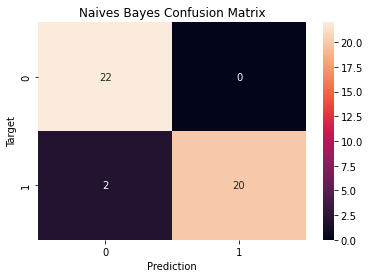

In [24]:
from sklearn.metrics import confusion_matrix
nb_cf = confusion_matrix(y_val, y_pred_nb)

# plot an heatmap of the confusion matrix
plt.figure()
sns.heatmap(nb_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Naives Bayes Confusion Matrix');

### Evaluation of the Naives Bayes Classifier

The model will be evaluated in terms of accuracy, sensitivity, specificity, precision, recall and AUC.

In [25]:
# obtain true and false positive and negative data point

TP = nb_cf[1,1] # true positive
TN = nb_cf[0,0] # true negative
FP = nb_cf[1,0] # False positive
FN = nb_cf[0,1] # false negative

# determine the evaluation metrics

nb_accuracy = (TP+TN)/(TP+TN+FN+FP)
nb_sensitivity = TP / (TP + FN)
nb_specificity = TN / (TN + FP)
nb_precision = TP / (TP + FP)
nb_recall = TP / (TP + FN)

'''Calculate AUC'''

#use model to predict probability that given y value is 1
y_pred_proba_nb = nb_clf.predict_proba(val_input)[::,1]

#calculate AUC of model
from sklearn.metrics import roc_auc_score
nb_auc = roc_auc_score(y_val, y_pred_proba_nb)

# create a dictionary for the evaluation metrics
nb_metrics = [{'Accuracy': nb_accuracy, 'Sensitivity': nb_sensitivity, 'Specificity': nb_specificity,
                  'Precision': nb_precision, 'Recall': nb_recall, 'AUC': nb_auc}]
nb_metrics_df = pd.DataFrame.from_dict(nb_metrics) # convert the dictionary to dataframe
nb_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.954545,1.0,0.916667,0.909091,1.0,0.964876


The evaluation metrics of Naives Bayes classifier can be summarized as:

- Accuracy - 95%
- Sensitivity - 100%
- Specificity - 92%
- AUC - 96.5%

## Model 2 - KNeighbors Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier() # get instance of model
knn_clf.fit(train_input, y_train) # train/fit the model
y_pred_knn = knn_clf.predict(val_input) # get the target predictions
accuracy = accuracy_score(y_val, y_pred_knn) #obtain the accuracy score of the model

print(f"KNN Classifier Accuracy: {accuracy*100:.1f}%")

KNN Classifier Accuracy: 88.6%


The KNN classifier accuracy of **88.6%** obtained is low compared to the Naives Bayes classifier. We will tune the parameter of the classifier to generate better accuracy and other metrics.

### Hyperparameter Tuning of KNN Classifier

We will be using the GridSearchCV library of the sklearn to search for the best parameters of the KNN classifiers to be used for the improvement of the model.

In [27]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)#Create new KNN object

knn_2 = KNeighborsClassifier()

#Use GridSearch
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(train_input, y_train)
y_pred = best_model.predict(val_input)
accuracy = accuracy_score(y_val, y_pred)

#Print The value of best Hyperparameters
print('Accuracy: ', accuracy)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Accuracy:  0.9090909090909091
Best leaf_size: 1
Best p: 2
Best n_neighbors: 13


The model accuracy has been increased to 0.909 after tuning. The best hyperparameters values that gave the best accuracy are leaf_size of 1, p of 2 and n_neighbors of 13. We will be using these parameters to train the KNN classifiers.

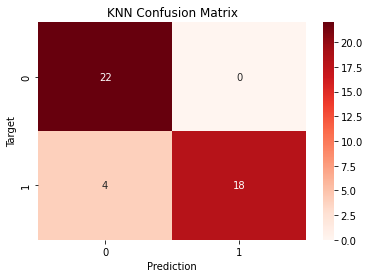

In [28]:
knn_clf2 = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=13)
knn_clf2.fit(train_input, y_train)
y_pred = knn_clf2.predict(val_input)

# generate the confusion matrix for the KNN classifier
knn_cf = confusion_matrix(y_val, y_pred)

# plot an heatmap of the confusion matrix
plt.figure()
sns.heatmap(knn_cf, cmap='Reds', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('KNN Confusion Matrix');

### Determine the Metrics of the KNN Classifier

In [29]:
TP = knn_cf[1,1] # true positive
TN = knn_cf[0,0] # true negative
FP = knn_cf[1,0] # False positive
FN = knn_cf[0,1] # false negative

# determine the evaluation metrics
knn_accuracy = (TP+TN)/(TP+TN+FN+FP)
knn_sensitivity = TP / (TP + FN)
knn_specificity = TN / (TN + FP)
knn_precision = TP / (TP + FP)
knn_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
y_pred_proba_knn = knn_clf2.predict_proba(val_input)[::,1]

#calculate AUC of model
knn_auc = roc_auc_score(y_val, y_pred_proba_knn)

# create a dictionary for the evaluation metrics
knn_metrics = [{'Accuracy': knn_accuracy, 'Sensitivity': knn_sensitivity, 'Specificity': knn_specificity,
                  'Precision': knn_precision, 'Recall': knn_recall, 'AUC': knn_auc}]
knn_metrics_df = pd.DataFrame.from_dict(knn_metrics) # convert the dictionary to dataframe
knn_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.909091,1.0,0.846154,0.818182,1.0,0.956612


The evaluation metrics of KNN classifier can be summarized as:

- Accuracy - 91%
- Sensitivity - 100%
- Specificity - 85%
- AUC - 95.6%



### Comparing the two Classifiers

In [30]:
metrics = {'Model': ['KNN', 'Naives Bayes'], 'Accuracy': [knn_accuracy, nb_accuracy], 
            'Sensitivity': [knn_sensitivity, nb_sensitivity], 'Specificity': [knn_specificity, nb_specificity],
            'Precision': [knn_precision, nb_precision], 'Recall': [knn_recall, nb_recall], 'AUC': [knn_auc, nb_auc]}

# convert the metrics dictionary to dataframe
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,KNN,0.909091,1.0,0.846154,0.818182,1.0,0.956612
1,Naives Bayes,0.954545,1.0,0.916667,0.909091,1.0,0.964876


Comparing the two classifiers performance, it is evident that Naives Bayes is a better classifier for the dataset provided than KNearest Neighbor. It has better accuracy, specificity, precision and AUC.

The evaluation metrics of the two models will be compared using barplot

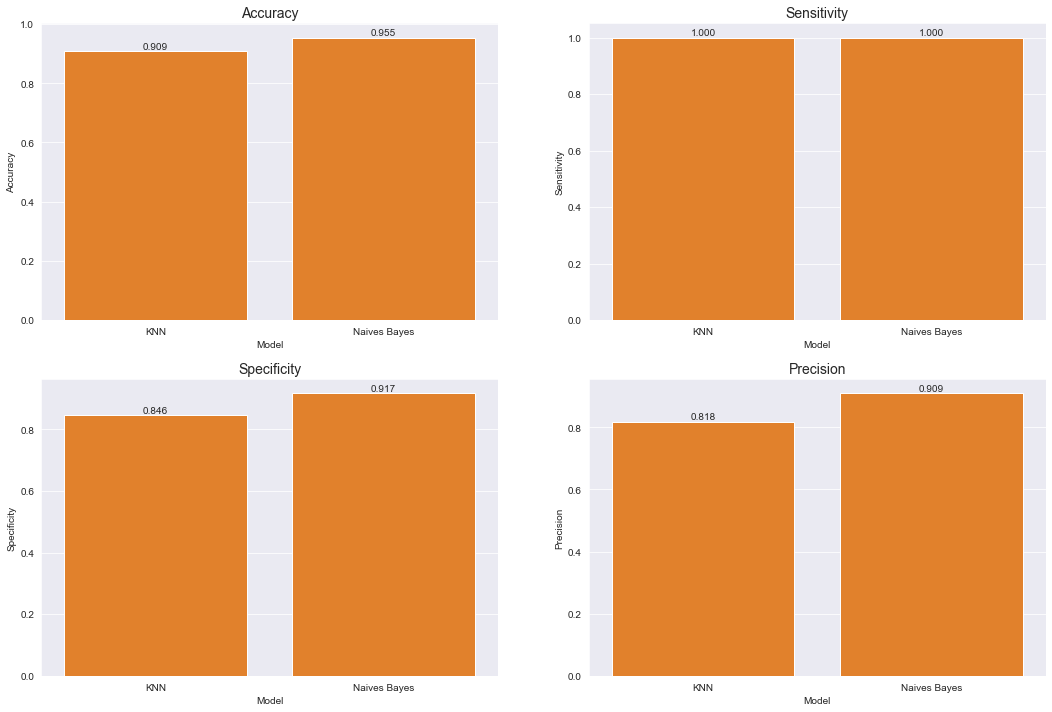

In [33]:
# set figure for the plots
plt.figure(figsize=[18, 12])
sns.set_style('darkgrid')
color = sns.color_palette()[1] # plot the bars with the same colour for all categories

plt.subplot(2,2,1)
ax = sns.barplot(data=metrics_df, x='Model', y='Accuracy', color=color)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title("Accuracy", fontsize=14)

plt.subplot(2,2,2)
ax = sns.barplot(data=metrics_df, x='Model', y='Sensitivity', color=color)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title("Sensitivity", fontsize=14)

plt.subplot(2,2,3)
ax = sns.barplot(data=metrics_df, x='Model', y='Specificity', color=color)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title("Specificity", fontsize=14)

plt.subplot(2,2,4)
ax = sns.barplot(data=metrics_df, x='Model', y='Precision', color=color)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title("Precision", fontsize=14);

## Conclusion

- The performance metrics of the two models showed that Naives Bayes Classifier perform better than KNearest Neighbor in classifying Alzheimer's disease patients using the exatracted MRI images and additional dataset from ADNI.

- The KNN classifier was tuned using grid search to determine parameters which gives the best accuracy for the classifier.